In [40]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
import scipy.stats as sc
import seaborn as sns

In [2]:
tree = et.parse("../data/AviationData.xml")

In [3]:
root = tree.getroot()
#check the number of child element
len(root[0])

77257

In [4]:
#test
root[0][1000].attrib

{'AccidentNumber': 'ERA15CA086',
 'AirCarrier': '',
 'AircraftCategory': 'Airplane',
 'AircraftDamage': 'Substantial',
 'AirportCode': '2A5',
 'AirportName': 'CAUSEY',
 'AmateurBuilt': 'No',
 'BroadPhaseOfFlight': 'LANDING',
 'Country': 'United States',
 'EngineType': 'Reciprocating',
 'EventDate': '12/27/2014',
 'EventId': '20141230X10247',
 'FARDescription': 'Part 91: General Aviation',
 'InjurySeverity': 'Non-Fatal',
 'InvestigationType': 'Accident',
 'Latitude': '35.911667',
 'Location': 'Liberty, NC',
 'Longitude': '-79.617778',
 'Make': 'CESSNA',
 'Model': '310N',
 'NumberOfEngines': '2',
 'PublicationDate': '06/09/2015',
 'PurposeOfFlight': 'Personal',
 'RegistrationNumber': 'N177JD',
 'ReportStatus': 'Probable Cause',
 'Schedule': '',
 'TotalFatalInjuries': '',
 'TotalMinorInjuries': '',
 'TotalSeriousInjuries': '',
 'TotalUninjured': '2',
 'WeatherCondition': 'VMC'}

In [5]:
#create a dataframe
events_list = [i.attrib for i in root[0]]
df_events = pd.DataFrame(events_list)
df_events.head()

,AccidentNumber,AirCarrier,AircraftCategory,AircraftDamage,AirportCode,AirportName,AmateurBuilt,BroadPhaseOfFlight,Country,EngineType,...,PublicationDate,PurposeOfFlight,RegistrationNumber,ReportStatus,Schedule,TotalFatalInjuries,TotalMinorInjuries,TotalSeriousInjuries,TotalUninjured,WeatherCondition
0,GAA15CA244,,,,,,,,United States,,...,,,N786AB,Preliminary,,,,,,
1,CEN15LA392,,Airplane,Substantial,IWS,WEST HOUSTON,No,LANDING,United States,,...,09/04/2015,Instructional,N452CS,Preliminary,,,,,2,VMC
2,GAA15CA246,,,,,,,,United States,,...,,,N112RP,Preliminary,,,,,,
3,GAA15CA243,,,,,,,,United States,,...,,,N8404X,Preliminary,,,,,,
4,GAA15CA242,,,,,,,,United States,,...,,,N5255G,Preliminary,,,,,,


## Clean-up

The dataframe has one major problem: empty cells from XML are stored as '' instead of null. 

In [6]:
df_events['EventDate'] = pd.to_datetime(df_events['EventDate'])
df_events['PublicationDate'] = pd.to_datetime(df_events['PublicationDate'])

In [8]:
#replace empty string with nan and calculate missing value
df_e = df_events.replace(r'^\s*$',np.nan, regex=True)
(len(df_e.index)-df_e.count())/len(df_e.index)*100

AccidentNumber           0.000000
AirCarrier              95.058053
AircraftCategory        78.616824
AircraftDamage           3.085805
AirportCode             43.724193
AirportName             38.735649
AmateurBuilt             0.846525
BroadPhaseOfFlight       8.060111
Country                  0.660134
EngineType               4.153669
EventDate                0.003883
EventId                  0.000000
FARDescription          78.429139
InjurySeverity           0.137204
InvestigationType        0.000000
Latitude                69.244211
Location                 0.104845
Longitude               69.255860
Make                     0.112611
Model                    0.148854
NumberOfEngines          5.075268
PublicationDate         17.070298
PurposeOfFlight          4.657183
RegistrationNumber       3.567314
ReportStatus             0.000000
Schedule                85.271238
TotalFatalInjuries      27.785185
TotalMinorInjuries      29.154640
TotalSeriousInjuries    30.434783
TotalUninjured

From the missing value table above, it is clear that not every variables are usable for meaningful analysis.
The subsequent dataset will be a subset of the original dataset based on 'Make' variable as it has very few missing values.

In [35]:
for i in list(df_e.columns):
    print i
    print df_e[i].value_counts()[:10]
    print "\n"

AccidentNumber
FTW82FRA19    1
ANC83FAA03    1
LAX85FA036    1
LAX85FA030    1
CHI84LA299    1
CHI89LA158    1
CHI89LA159    1
CHI89LA156    1
CHI89LA152    1
NYC96LA110    1
Name: AccidentNumber, dtype: int64


AirCarrier
UNITED AIRLINES                           49
AMERICAN AIRLINES                         41
CONTINENTAL AIRLINES                      25
USAIR                                     24
DELTA AIR LINES INC                       23
AMERICAN AIRLINES, INC.                   22
SOUTHWEST AIRLINES CO                     21
CONTINENTAL AIRLINES, INC.                19
UNITED AIR LINES INC                      14
SIMMONS AIRLINES (DBA: AMERICAN EAGLE)    12
Name: AirCarrier, dtype: int64


AircraftCategory
Airplane             14210
Helicopter            1775
Glider                 261
Balloon                120
Gyrocraft               62
Unknown                 40
Weight-Shift            20
Ultralight              18
Powered Parachute       10
Powered-Lift             2
Name: A

In [15]:
#list top 10 fatal crashes in USA 
df_e[(df_e.Country == 'United States')][['EventDate','Make','Model','TotalFatalInjuries']].sort_values(by='TotalFatalInjuries',ascending=False).head(10)

,EventDate,Make,Model,TotalFatalInjuries
25773,2001-09-11,Boeing,767-200ER,92
60320,1987-03-04,CASA,C-212-CC,9
10257,2009-08-08,PIPER,PA-32R-300,9
27311,2001-01-14,Beech,65-A90,9
10256,2009-08-08,EUROCOPTER,AS 350 BA,9
333,2015-06-25,DEHAVILLAND,DHC 3,9
66449,1985-02-04,BEECH,65-A80,9
34413,1997-10-08,Cessna,208B,9
12138,2008-08-05,SIKORSKY,S-61N,9
47667,1991-12-11,BEECH,400,9


In [36]:
#df_e[['TotalFatalInjuries']].groupby(df_e['EventDate'].map(lambda x: x.year)).count()

Assumption: No value in TotalInjured variables doesn't always mean that it is zero as it can also means that it is unknown.

In [67]:
#code to transform no value = 0
#df_e[['TotalFatalInjuries','TotalMinorInjuries','TotalSeriousInjuries','TotalUninjured']] = df_e[['TotalFatalInjuries','TotalMinorInjuries','TotalSeriousInjuries','TotalUninjured']].fillna(0)
df_e[['TotalFatalInjuries','TotalMinorInjuries','TotalSeriousInjuries','TotalUninjured']] = df_e[['TotalFatalInjuries','TotalMinorInjuries','TotalSeriousInjuries','TotalUninjured']].apply(pd.to_numeric)

In [68]:
df_e['TotalPerson'] = df_e['TotalFatalInjuries'] + df_e['TotalSeriousInjuries'] + df_e['TotalMinorInjuries'] + df_e['TotalUninjured'] 

In [69]:
df_e.head()

,AccidentNumber,AirCarrier,AircraftCategory,AircraftDamage,AirportCode,AirportName,AmateurBuilt,BroadPhaseOfFlight,Country,EngineType,...,PurposeOfFlight,RegistrationNumber,ReportStatus,Schedule,TotalFatalInjuries,TotalMinorInjuries,TotalSeriousInjuries,TotalUninjured,WeatherCondition,TotalPerson
0,GAA15CA244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN,...,NaN,N786AB,Preliminary,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CEN15LA392,NaN,Airplane,Substantial,IWS,WEST HOUSTON,No,LANDING,United States,NaN,...,Instructional,N452CS,Preliminary,NaN,NaN,NaN,NaN,2.0,VMC,NaN
2,GAA15CA246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN,...,NaN,N112RP,Preliminary,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GAA15CA243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN,...,NaN,N8404X,Preliminary,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GAA15CA242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN,...,NaN,N5255G,Preliminary,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df_e['PctInjured'] = (df_e['TotalSeriousInjuries'] + df_e['TotalMinorInjuries']) / df_e['TotalPerson'] * 100
df_e['PctDeath'] = df_e['TotalFatalInjuries'] / df_e['TotalPerson'] * 100

In [71]:
print "Number of accidents in the dataset: " + str(len(df_e.index))
print "Date range: " + str(df_e['EventDate'].min()) + " to " + str(df_e['EventDate'].max())
df_e[['TotalFatalInjuries','TotalMinorInjuries','TotalSeriousInjuries','TotalUninjured']].describe()

Number of accidents in the dataset: 77257
Date range: 1948-10-24 00:00:00 to 2015-09-01 00:00:00


C:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,TotalFatalInjuries,TotalMinorInjuries,TotalSeriousInjuries,TotalUninjured
count,55791.000000,54733.000000,53744.000000,65862.000000
mean,0.788962,0.492555,0.309895,5.716817
std,6.087442,2.779814,1.368488,29.052413
min,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,349.000000,380.000000,111.000000,699.000000


In [79]:
#df_e1 = df_e[['PctInjured','PctDeath','TotalPerson']]
df_e1 = df_e[(df_e.TotalPerson <25)]
df_e2 = df_e[(df_e.TotalPerson >=25) & (df_e.PctDeath>0)]

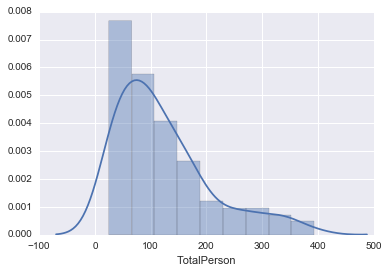

In [80]:
sns.distplot(df_e2['TotalPerson'].dropna())

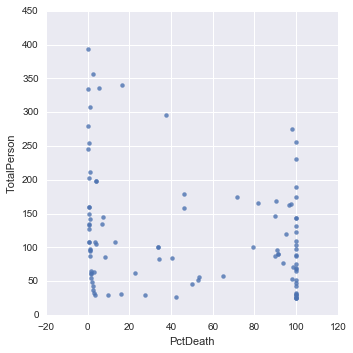

In [81]:
sns.lmplot("PctDeath", "TotalPerson", data=df_e2, fit_reg=False)

### Initial Impression
1. The dataset covers 6 decades of accidents, from 1948 to 2015
2. Overall, a very large number of accidents don't result in fatalities or injuries
3. However, once it does, it's ugly.

## Initial Exploration

Question: what is the most dangerous phase of flight, represented by number of fatalities?

In [65]:
#check phase and fatalinjuries
df_phase_e1 = df_e1[['BroadPhaseOfFlight','TotalFatalInjuries']].groupby('BroadPhaseOfFlight',as_index=False).count()
df_phase_e2 = df_e2[['BroadPhaseOfFlight','TotalFatalInjuries']].groupby('BroadPhaseOfFlight',as_index=False).count()
df_phase_e1


,BroadPhaseOfFlight,TotalFatalInjuries
0,APPROACH,5093
1,CLIMB,1536
2,CRUISE,8052
3,DESCENT,1393
4,GO-AROUND,1062
5,LANDING,11751
6,MANEUVERING,6516
7,OTHER,94
8,STANDING,619
9,TAKEOFF,9881


In [66]:
df_phase_e2

,BroadPhaseOfFlight,TotalFatalInjuries
0,APPROACH,112
1,CLIMB,111
2,CRUISE,215
3,DESCENT,120
4,GO-AROUND,11
5,LANDING,157
6,MANEUVERING,10
7,OTHER,4
8,STANDING,79
9,TAKEOFF,191


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

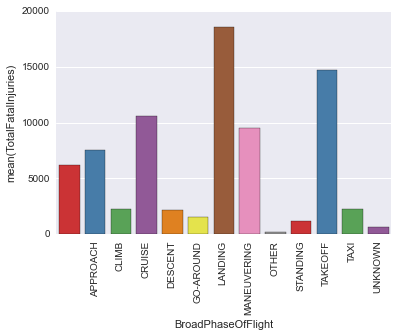

In [99]:
x = df_flight_phase['BroadPhaseOfFlight']
y = df_flight_phase['TotalFatalInjuries']
#lt.figure(figsize=(50,50))
sns.barplot(x,y,palette="Set1")
plt.xticks(rotation=90) 

In [57]:
ct = pd.crosstab(df_e.BroadPhaseOfFlight,df_e.AircraftDamage).apply(lambda x: x / x.sum()*100, axis=1)
ct

AircraftDamage,Destroyed,Minor,Substantial
BroadPhaseOfFlight,,,
APPROACH,26.896927,2.719608,70.383465
CLIMB,37.656100,6.147935,56.195965
CRUISE,33.554688,2.333984,64.111328
DESCENT,29.441624,4.111675,66.446701
GO-AROUND,27.103404,0.963391,71.933205
LANDING,4.277811,2.426467,93.295722
MANEUVERING,40.383393,0.709595,58.907011
OTHER,29.927007,14.598540,55.474453
STANDING,10.876452,18.585005,70.538543


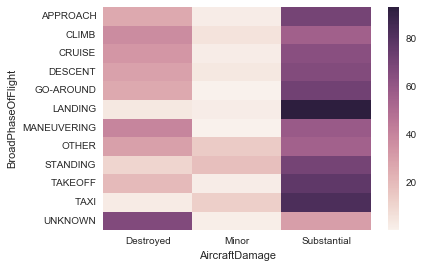

In [58]:
sns.heatmap(ct)

In [65]:
ct = pd.crosstab(df_e.AircraftDamage,df_e.NumberOfEngines).apply(lambda x: x / x.sum()*100, axis=1)
ct

NumberOfEngines,0,1,18,2,24,3,4
AircraftDamage,,,,,,,
Destroyed,1.073232,81.521465,0.000000,16.900253,0.000000,0.157828,0.347222
Minor,3.282588,32.683159,0.000000,48.001903,0.000000,9.372027,6.660324
Substantial,1.433151,88.553431,0.001864,9.631369,0.001864,0.184502,0.193820


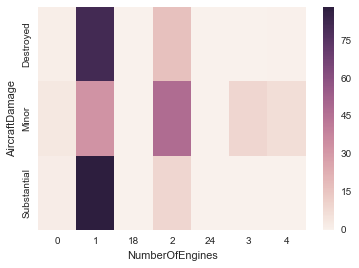

In [62]:
sns.heatmap(ct)